In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

path = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/module_5_auto.csv"
df = pd.read_csv(path)

df.to_csv('mod5.csv')
df = df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [72]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive,fixed,interact_manual

In [38]:
def distributionplot(redfun,bluefun,redname,bluename,Title):
    length=10
    width=12
    plt.figure(figsize=(width,length))
    
    ax1= sns.distplot(redfun,hist=False,color='r',label=redname)
    ax2=sns.distplot(bluefun,hist=False,color='b',label=bluename,ax=ax1)
    
    plt.title(Title)
    plt.xlabel('price of the cars')
    plt.ylabel('proportion of cars')
    plt.show()
    plt.close()

def pollyplot(xtrain,xtest,ytrain,ytest,lr,poly_trans):
    width=12
    length=10
    plt.figure(figsize=(width,length))
    
    #lr:linear regression object
    #ploy_trans:polynomial transformation object
    
    xmax= max([xtrain.values.max(),xtest.values.max()])
    xmin= min([xtrain.values.max(),xtest.values.min()])
    x= np.arange(xmin,xmax,0.1)
    
    plt.plot(xtrain,ytrain, 'ro',label='Training data')
    plt.plot(xtest,ytest,'go',label='Test data')
    
    plt.plot(x,lr.predict(poly_trans.fit_transform(x.reshape(-1,1))),'-',label='Predicted Function')
    plt.ylim([-10000,60000])
    plt.ylabel('price')
    plt.legend()

In [8]:
from sklearn.model_selection import train_test_split

y=df['price']
x=df.drop('price',axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.40,random_state=1)
print("no of test samples:", xtest.shape[0])
print("no of train samples:",xtrain.shape[0])

from sklearn.linear_model import LinearRegression
lre=LinearRegression()
lre.fit(xtrain[['horsepower']],ytrain)
print(lre.score(xtrain[['horsepower']],ytrain))
print(lre.score(xtest[['horsepower']],ytest))

no of test samples: 81
no of train samples: 120
0.6755325771980133
0.6111827529454427


In [9]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.1,random_state=1)

print(lre.score(xtrain[["horsepower"]],ytrain))
print(lre.score(xtest[["horsepower"]],ytest))

0.6616156215784712
0.373620431522312


In [10]:
from sklearn.model_selection import cross_val_score

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=1)
lre.fit(xtrain[["horsepower"]],ytrain)
rcross=cross_val_score(lre,x[['horsepower']],y,cv=4)
rcross
print("The mean of the folds are", rcross.mean(), "and the standard deviation is" , rcross.std())

The mean of the folds are 0.5220099150421194 and the standard deviation is 0.2911839444756025


In [52]:
-1 * cross_val_score(lre,x[['horsepower']], y,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026705, 43745493.26505171, 12539630.3401493 ,
       17561927.72247589])

In [11]:
from sklearn.model_selection import cross_val_predict
yhat=cross_val_predict(lre,x[['horsepower']],y,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

In [12]:
lr=LinearRegression()
lr.fit(x_train[['horsepower','curb-weight','engine-size','highway-mpg']],y_train)
yhat_train=lr.predict(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])
print(yhat_train[0:5])

yhat_test=lr.predict(x_test[['horsepower','curb-weight','engine-size','highway-mpg']])
print(yhat_test[0:5])

[ 7426.6731551  28323.75090803 14213.38819709  4052.34146983
 34500.19124244]
[11349.35089149  5884.11059106 11208.6928275   6641.07786278
 15565.79920282]


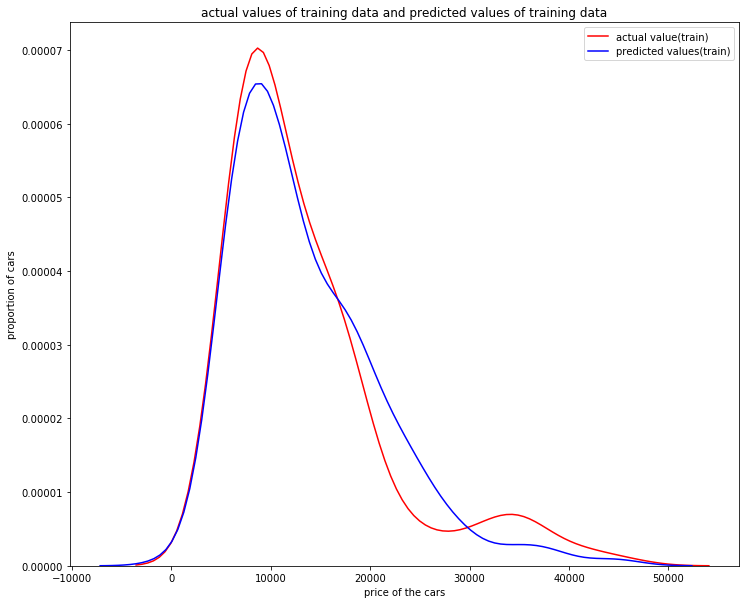

In [13]:
title='actual values of training data and predicted values of training data'
distributionplot(y_train,yhat_train,"actual value(train)","predicted values(train)",title)

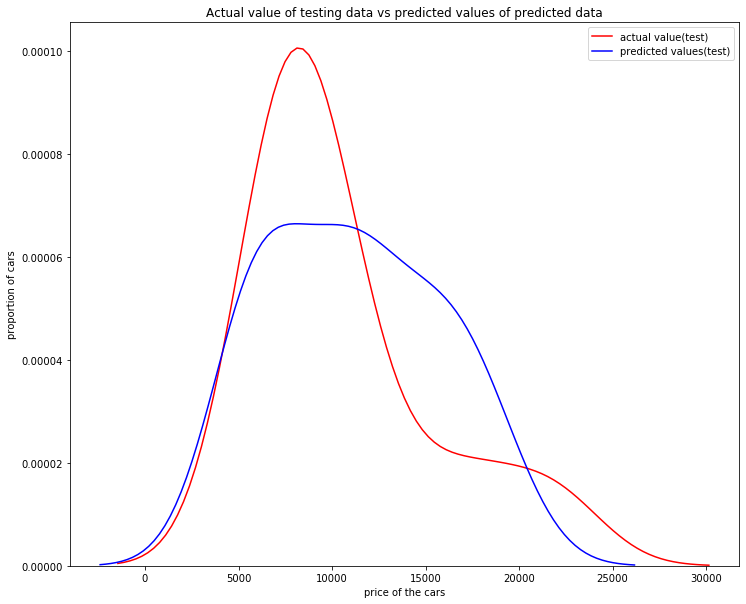

In [14]:
title='Actual value of testing data vs predicted values of predicted data'
distributionplot(y_test,yhat_test,"actual value(test)","predicted values(test)",title)

predicted val: [ 6728.65620589  7307.98839969 12213.78815605 18893.24697143
 19995.95065139] actual val: 18      6295.0
170    10698.0
107    13860.0
98     13499.0
177    15750.0
Name: price, dtype: float64
0.5567716902138419
-29.871343589942246


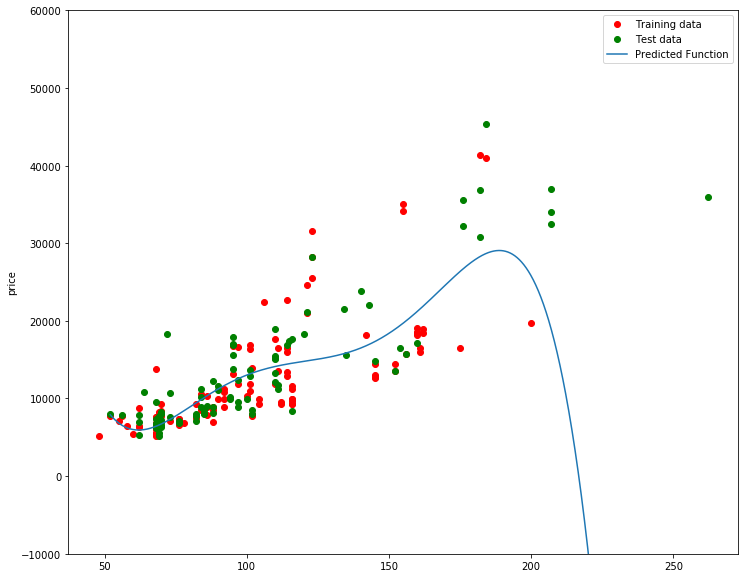

In [65]:
from sklearn.preprocessing import PolynomialFeatures

y=df['price']
x=df.drop('price',axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.45,random_state=0)

pr=PolynomialFeatures(degree=5)

x_train_pr=pr.fit_transform(x_train[['horsepower']])
x_test_pr=pr.fit_transform(x_test[['horsepower']])

poly=LinearRegression()
poly.fit(x_train_pr,y_train)
yhat=poly.predict(x_test_pr)
yhat[0:5]

print("predicted val:",yhat[0:5],"actual val:",y_test[0:5])

pollyplot(x_train[['horsepower']],x_test[['horsepower']],y_train,y_test,poly,pr)

print(poly.score(x_train_pr,y_train))
print(poly.score(x_test_pr,y_test))

Text(0.5, 1.0, 'R^2 Using Test Data')

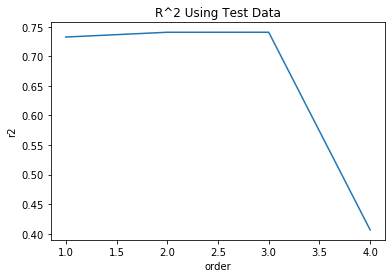

In [66]:
Rtest=[]
order =[1,2,3,4]
for n in order:
    pr=PolynomialFeatures(degree=n)
    x_train_pr=pr.fit_transform(x_train[['horsepower']])
    x_test_pr=pr.fit_transform(x_test[['horsepower']])
    
    poly.fit(x_train_pr,y_train)
    
    Rtest.append(poly.score(x_test_pr,y_test))
    
plt.plot(order,Rtest)
plt.xlabel("order")
plt.ylabel("r2")
plt.title('R^2 Using Test Data')


In [78]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_data, random_state=0)
    
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    
    pollyplot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [82]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

from sklearn.linear_model import Ridge
RigeModel= Ridge(alpha=0.1)
RigeModel.fit(x_train_pr,y_train)
yhat=RigeModel.predict(x_test_pr)

print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6567.83081933  9597.971514   20836.22326844 19347.69543463]
test set : [ 6295. 10698. 13860. 13499.]


c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.02972e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


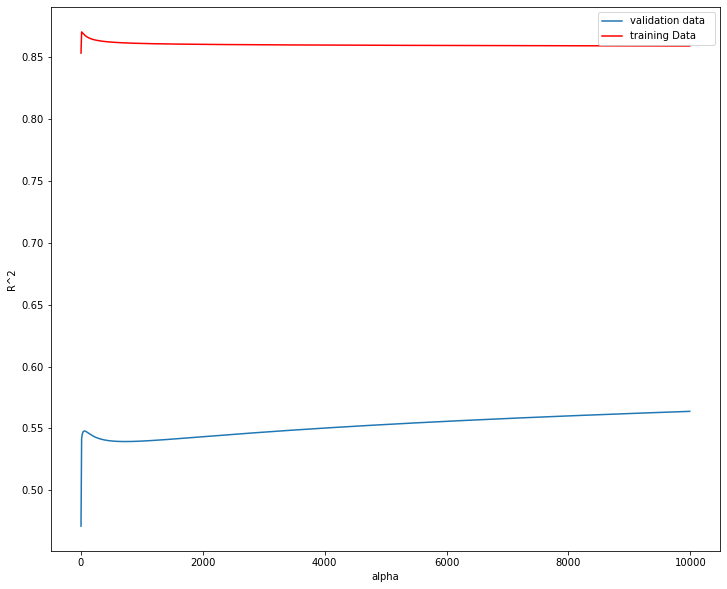

In [86]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))
    
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [98]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

R=Ridge()
para=[{'alpha':[0.01,0.1,10,100,1000,10000,100000,1000000],'normalize':['True','False']}]
grid=GridSearchCV(R,para,cv=4)

grid.fit(x[['horsepower','curb-weight','engine-size','highway-mpg']],y)
best=grid.best_estimator_
best.score(x[['horsepower','curb-weight','engine-size','highway-mpg']],y)

0.8067357870903058